In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

In [2]:
main_path = '../data/pilot'
input_path = f'{main_path}/input'
buildings_path = f'{input_path}/buildings'
roads_path = f'{input_path}/roads'
intersections_path = f'{input_path}/intersections'
urban_extents_path = f'{input_path}/urban_extents'
output_path = f'{main_path}/output'
plots_path = '../plots/pilot'

In [3]:
final_geo_df = pd.read_excel(f'{output_path}/excel/pilot_test_results.xlsx')

In [4]:
all_metrics_columns = ['metric_1','metric_2','metric_3','metric_4','metric_5','metric_6','metric_7','metric_8','metric_9','metric_10']
all_original_metrics_columns = ['metric_1','metric_2_original','metric_3_original','metric_4','metric_5_original','metric_6_original','metric_7_original','metric_8','metric_9','metric_10_original']
not_inverted_metrics = ['metric_2','metric_6','metric_7','metric_8']
metrics_to_invert = [col for col in all_metrics_columns if col not in not_inverted_metrics]

original_mask = [col for col in final_geo_df.columns if '_original' in col]

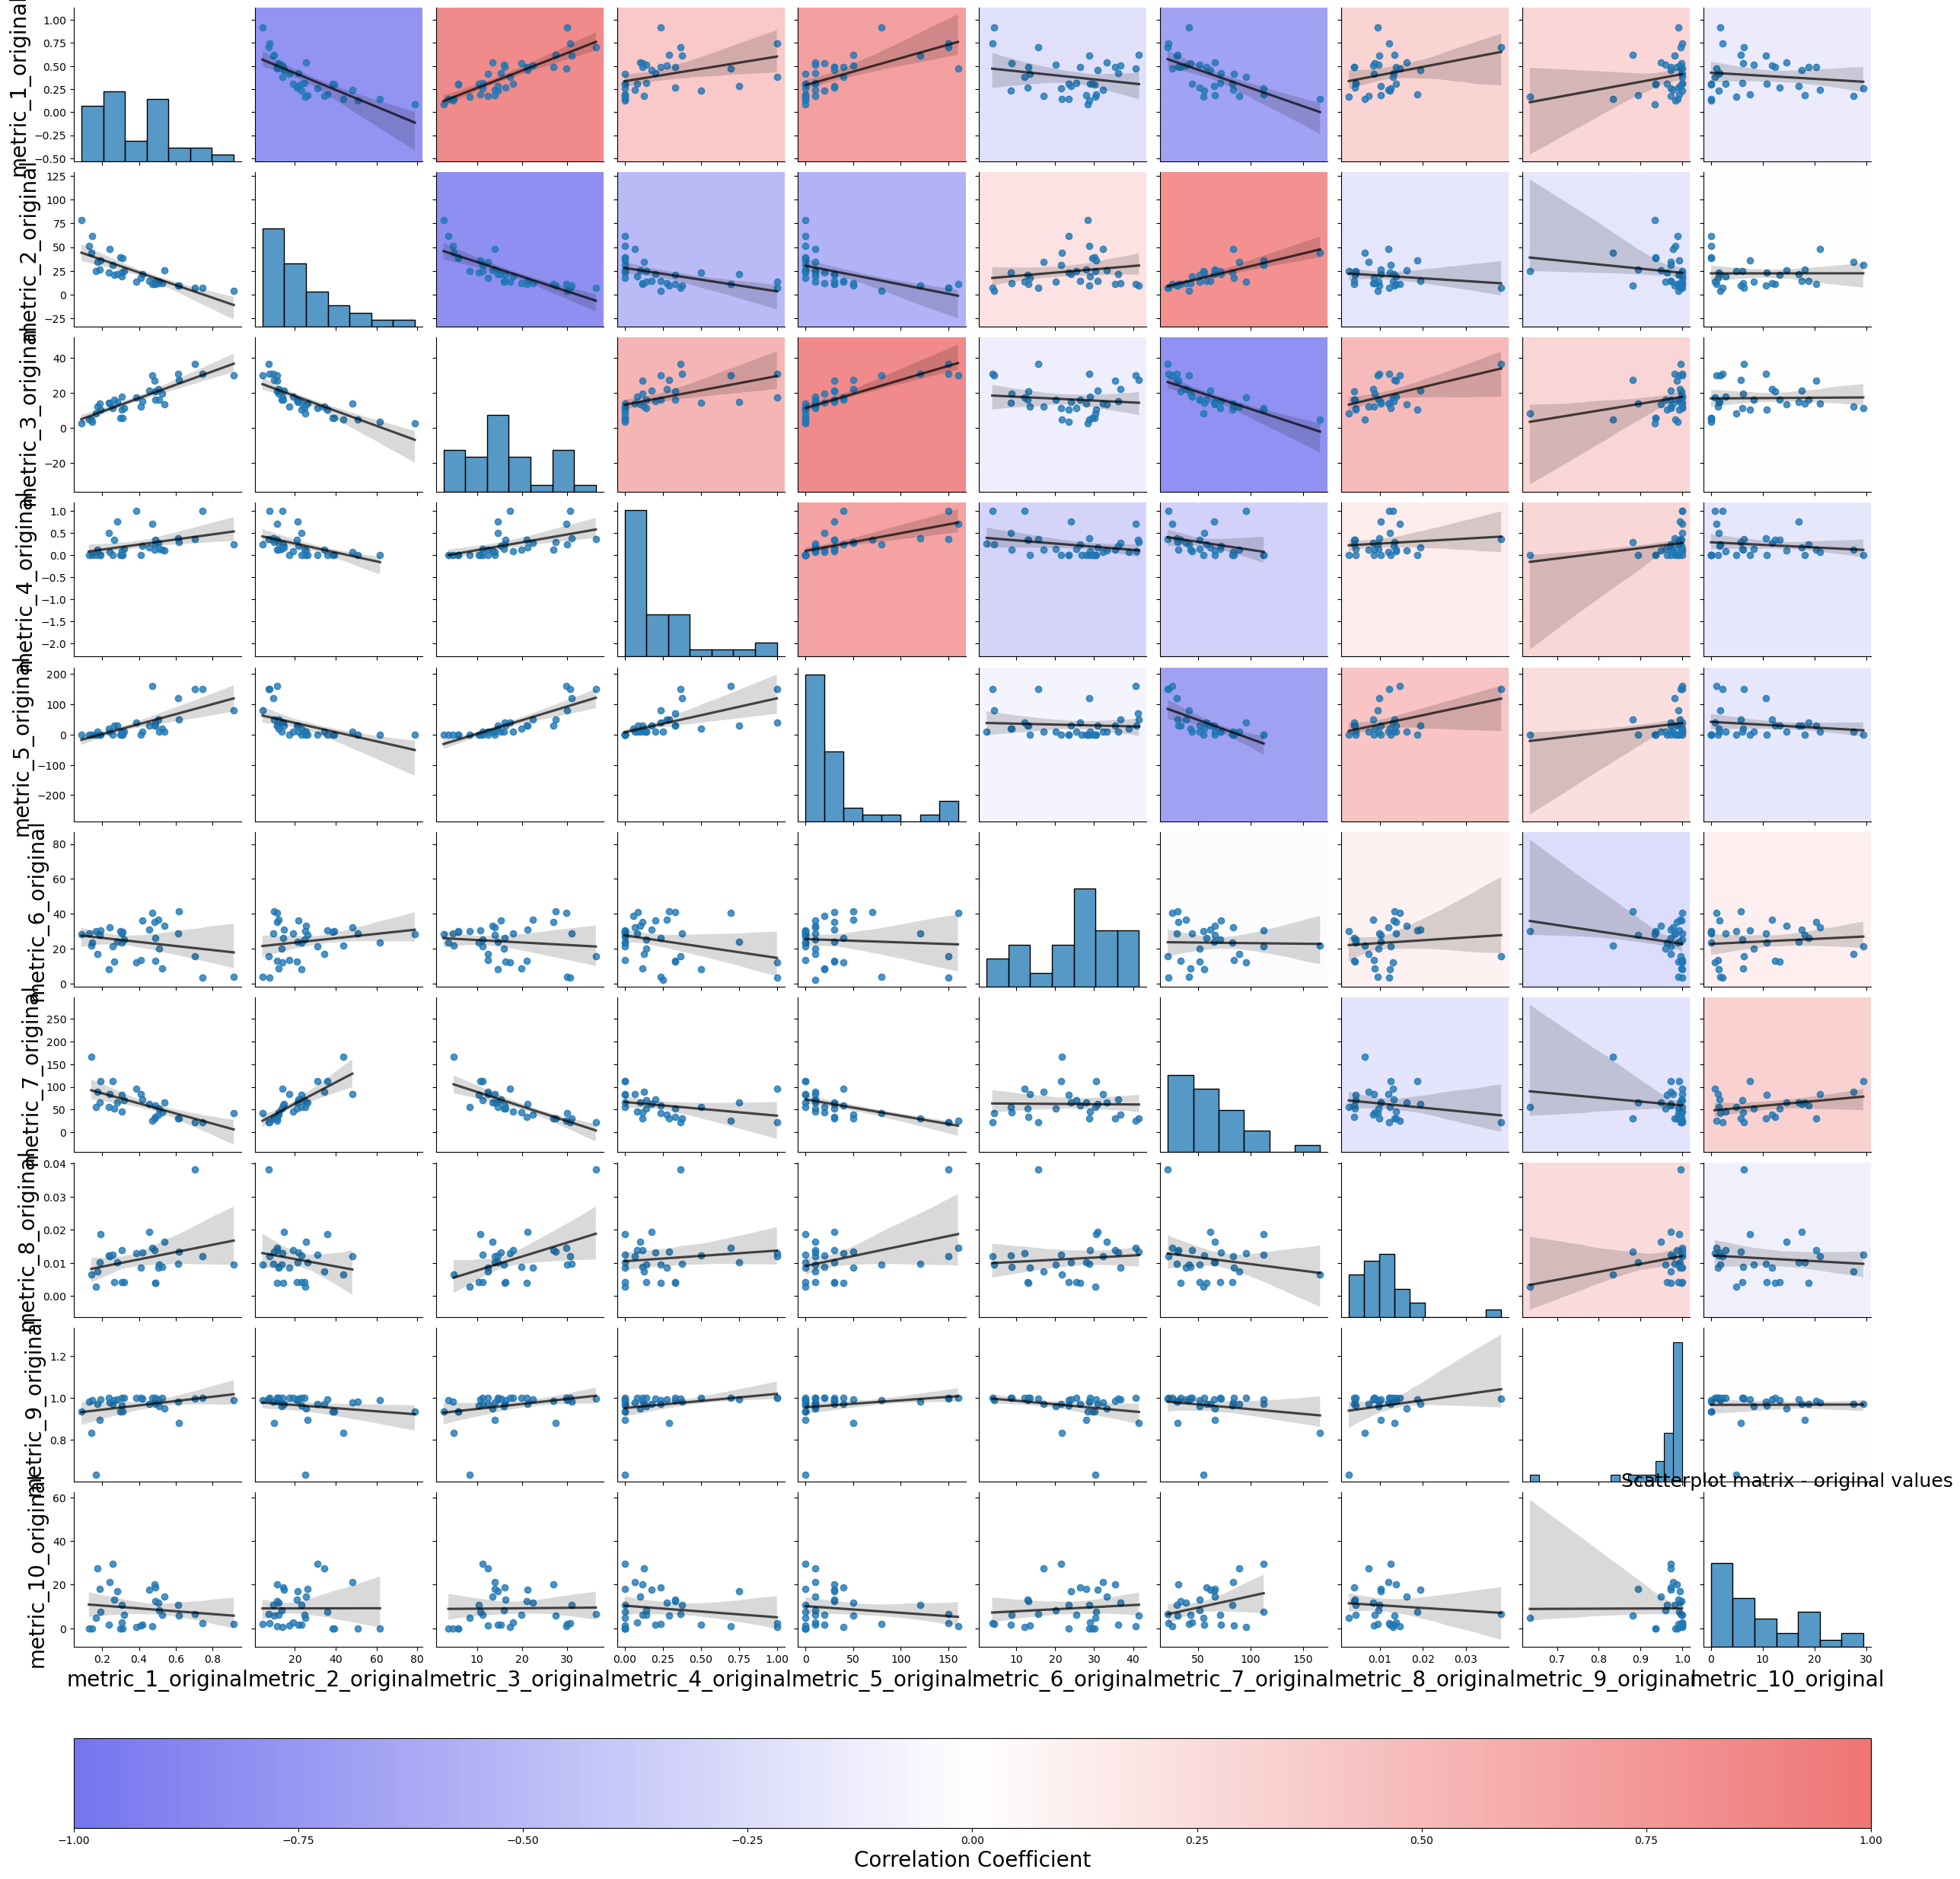

In [5]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[original_mask]

# Select only numeric columns
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr = df_subset[columns].corr()

# Define a custom colormap with alpha transparency (RGBA)
#colors = [(0.9, 0.1, 0.1, 0.6), (1, 1, 1, 0.6), (0.1, 0.1, 0.9, 0.6)]  # Red -> White -> Blue
colors = [(0.1, 0.1, 0.9, 0.6), (1, 1, 1, 0.6), (0.9, 0.1, 0.1, 0.6)]  # Blue -> White -> Red
cmap = LinearSegmentedColormap.from_list("corr_cmap", colors)

# Function to map correlation to color
def corr_to_color(val):
    """Map correlation values to RGBA colors using the colormap."""
    return cmap((val + 1) / 2)  # Normalize correlation to [0, 1]

# Create the scatterplot matrix with customized colors
g = sns.pairplot(
    df_subset[columns],
    kind="reg",
    plot_kws={'line_kws': {'color': 'black', 'alpha': 0.7}},  # Regression lines with transparency
)

# Apply correlation-based background colors
for i, j in zip(*np.triu_indices_from(corr, 1)):
    ax = g.axes[i, j]
    color = corr_to_color(corr.iloc[i, j])
    ax.set_facecolor(color)

# Adjust font size for larger column names
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)

# Add a colorbar to show the correlation color mapping
fig = g.fig
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=g.axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Correlation Coefficient', fontsize=20)

plt.title('Scatterplot matrix - original values', fontsize=18)
# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_original_colored.png', dpi=300, bbox_inches='tight')
plt.show()


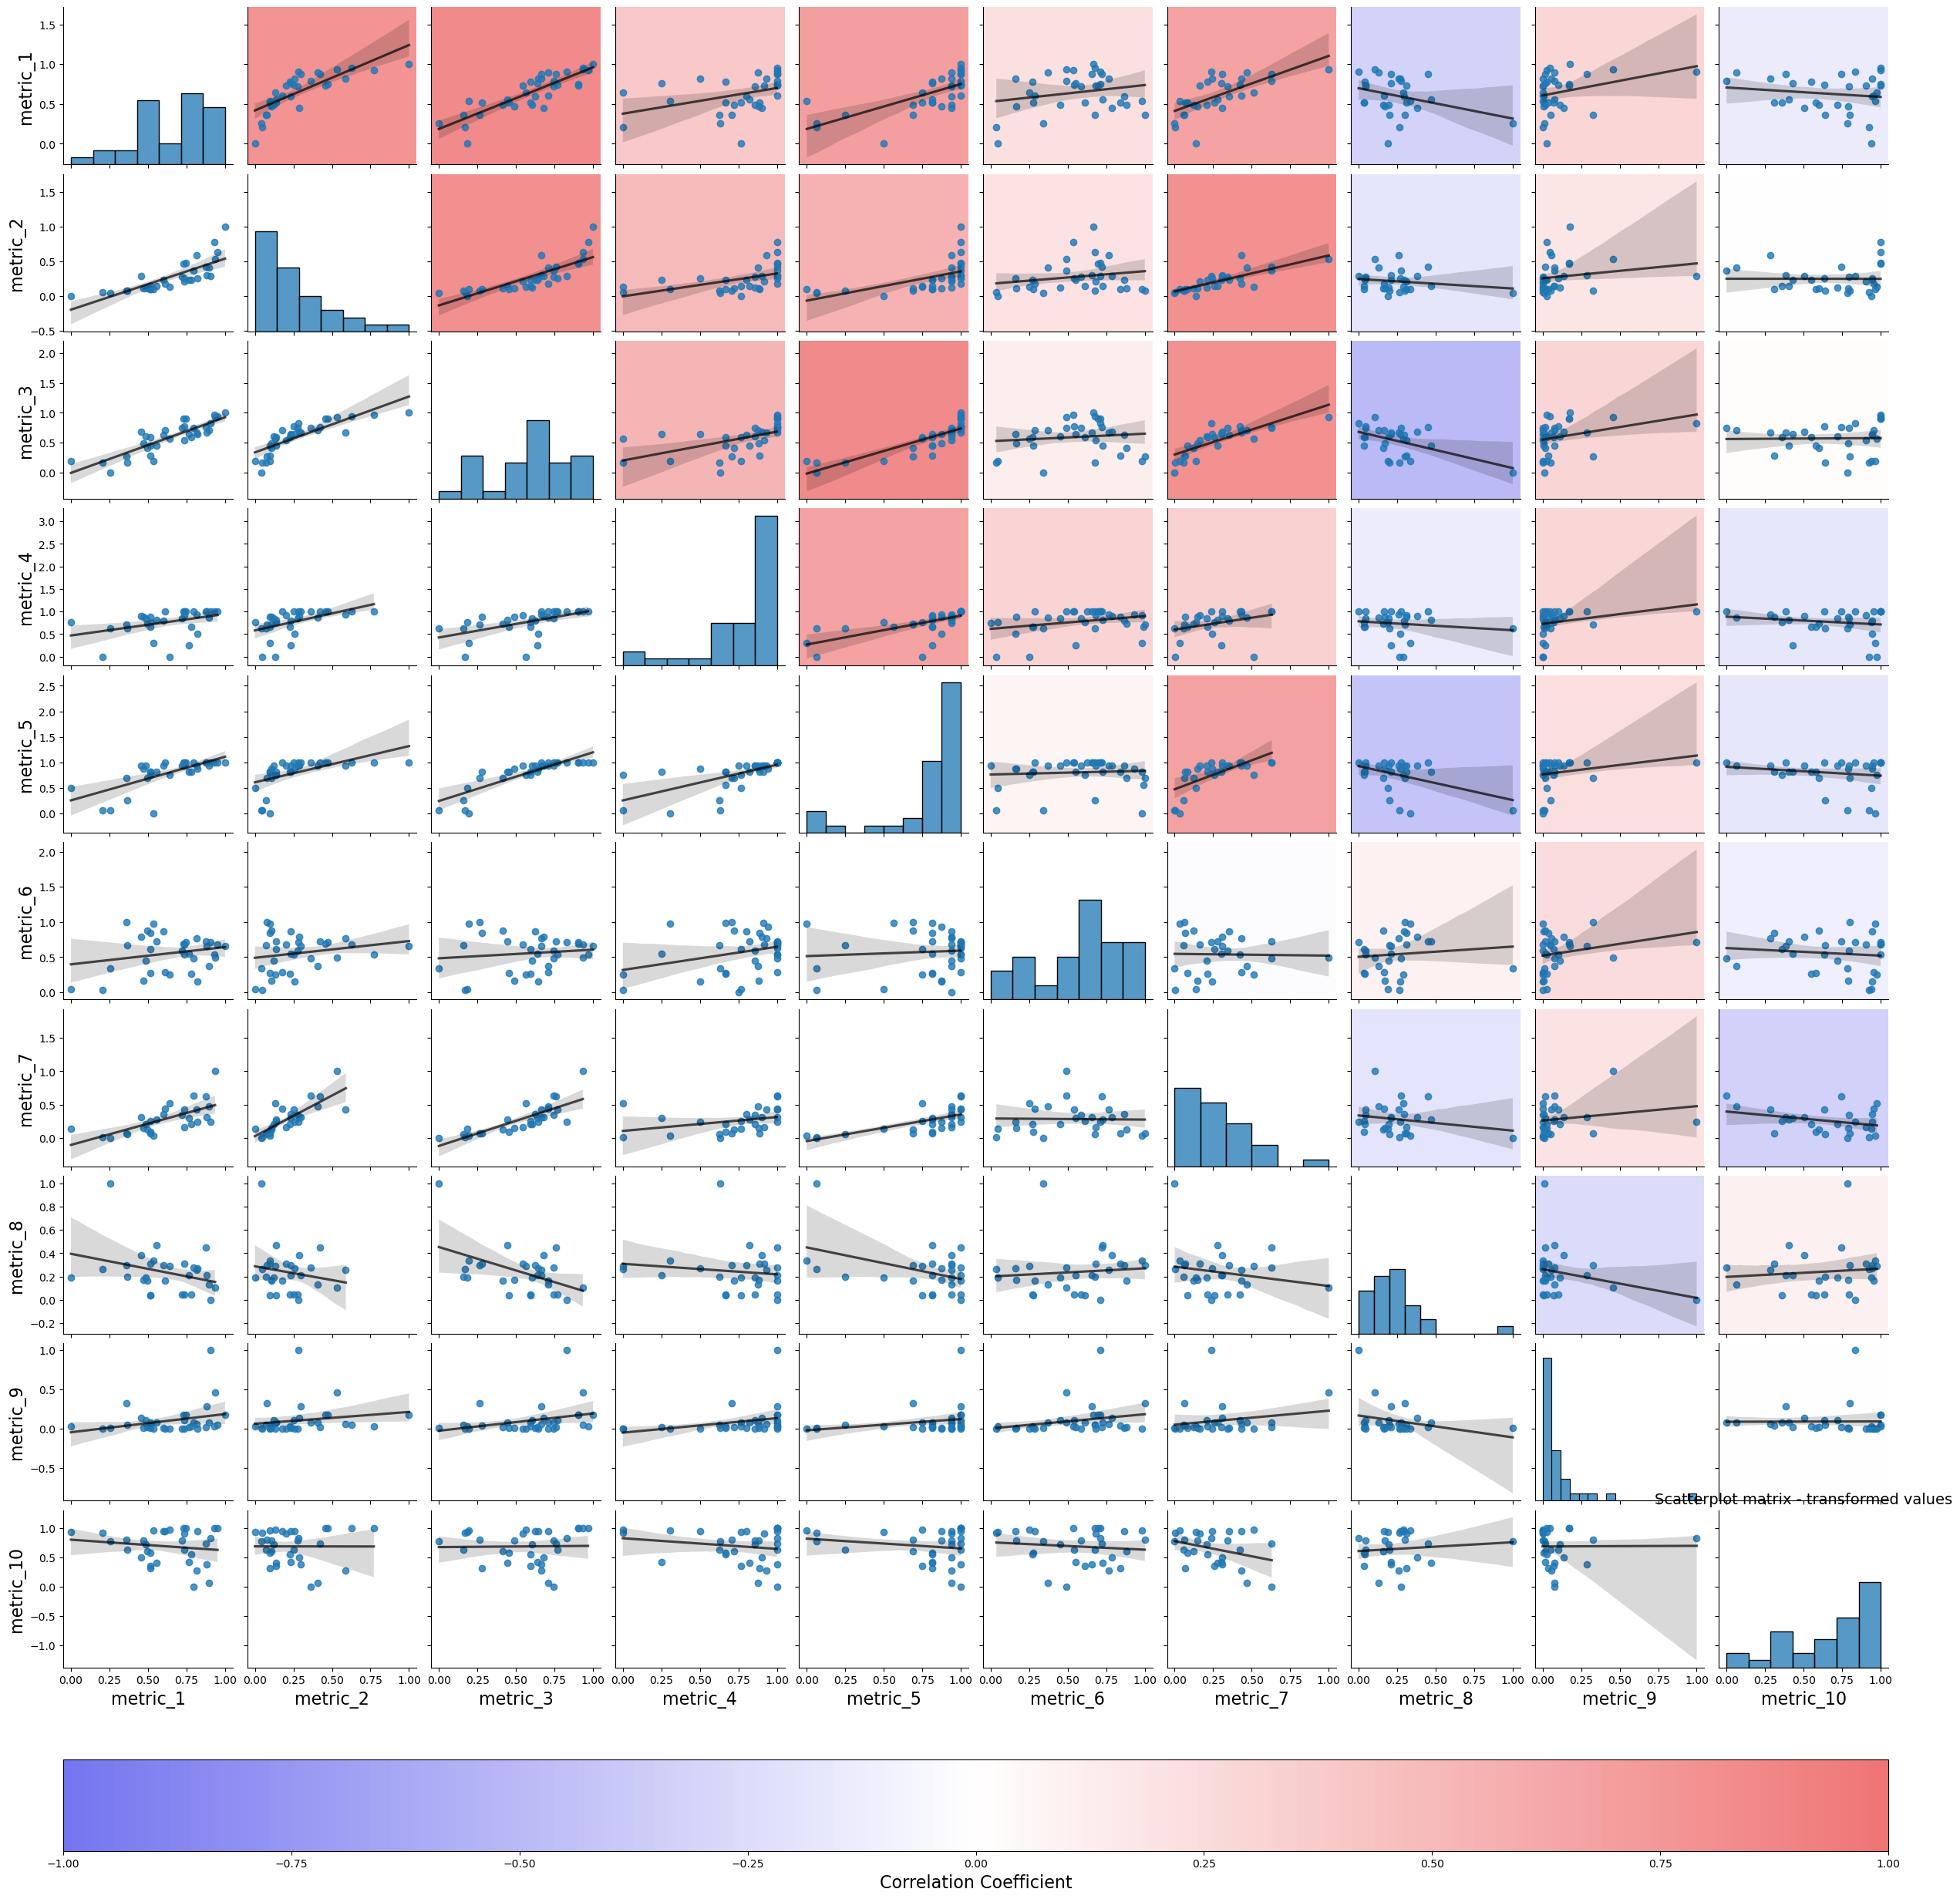

In [6]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[all_metrics_columns]

# Select only numeric columns
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr = df_subset[columns].corr()

# Define a custom colormap with alpha transparency (RGBA)
colors = [(0.1, 0.1, 0.9, 0.6), (1, 1, 1, 0.6), (0.9, 0.1, 0.1, 0.6)]  # Blue -> White -> Red
cmap = LinearSegmentedColormap.from_list("corr_cmap", colors)

# Function to map correlation to color
def corr_to_color(val):
    """Map correlation values to RGBA colors using the colormap."""
    return cmap((val + 1) / 2)  # Normalize correlation to [0, 1]

# Create the scatterplot matrix with customized colors
g = sns.pairplot(
    df_subset[columns],
    kind="reg",
    plot_kws={'line_kws': {'color': 'black', 'alpha': 0.7}},  # Regression lines with transparency
)

# Apply correlation-based background colors
for i, j in zip(*np.triu_indices_from(corr, 1)):
    ax = g.axes[i, j]
    color = corr_to_color(corr.iloc[i, j])
    ax.set_facecolor(color)

# Adjust font size for larger column names
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

# Add a colorbar to show the correlation color mapping
fig = g.fig
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=g.axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Correlation Coefficient', fontsize=16)

plt.title('Scatterplot matrix - transformed values', fontsize=14)

# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_transformed_colored.png', dpi=300, bbox_inches='tight')
plt.show()

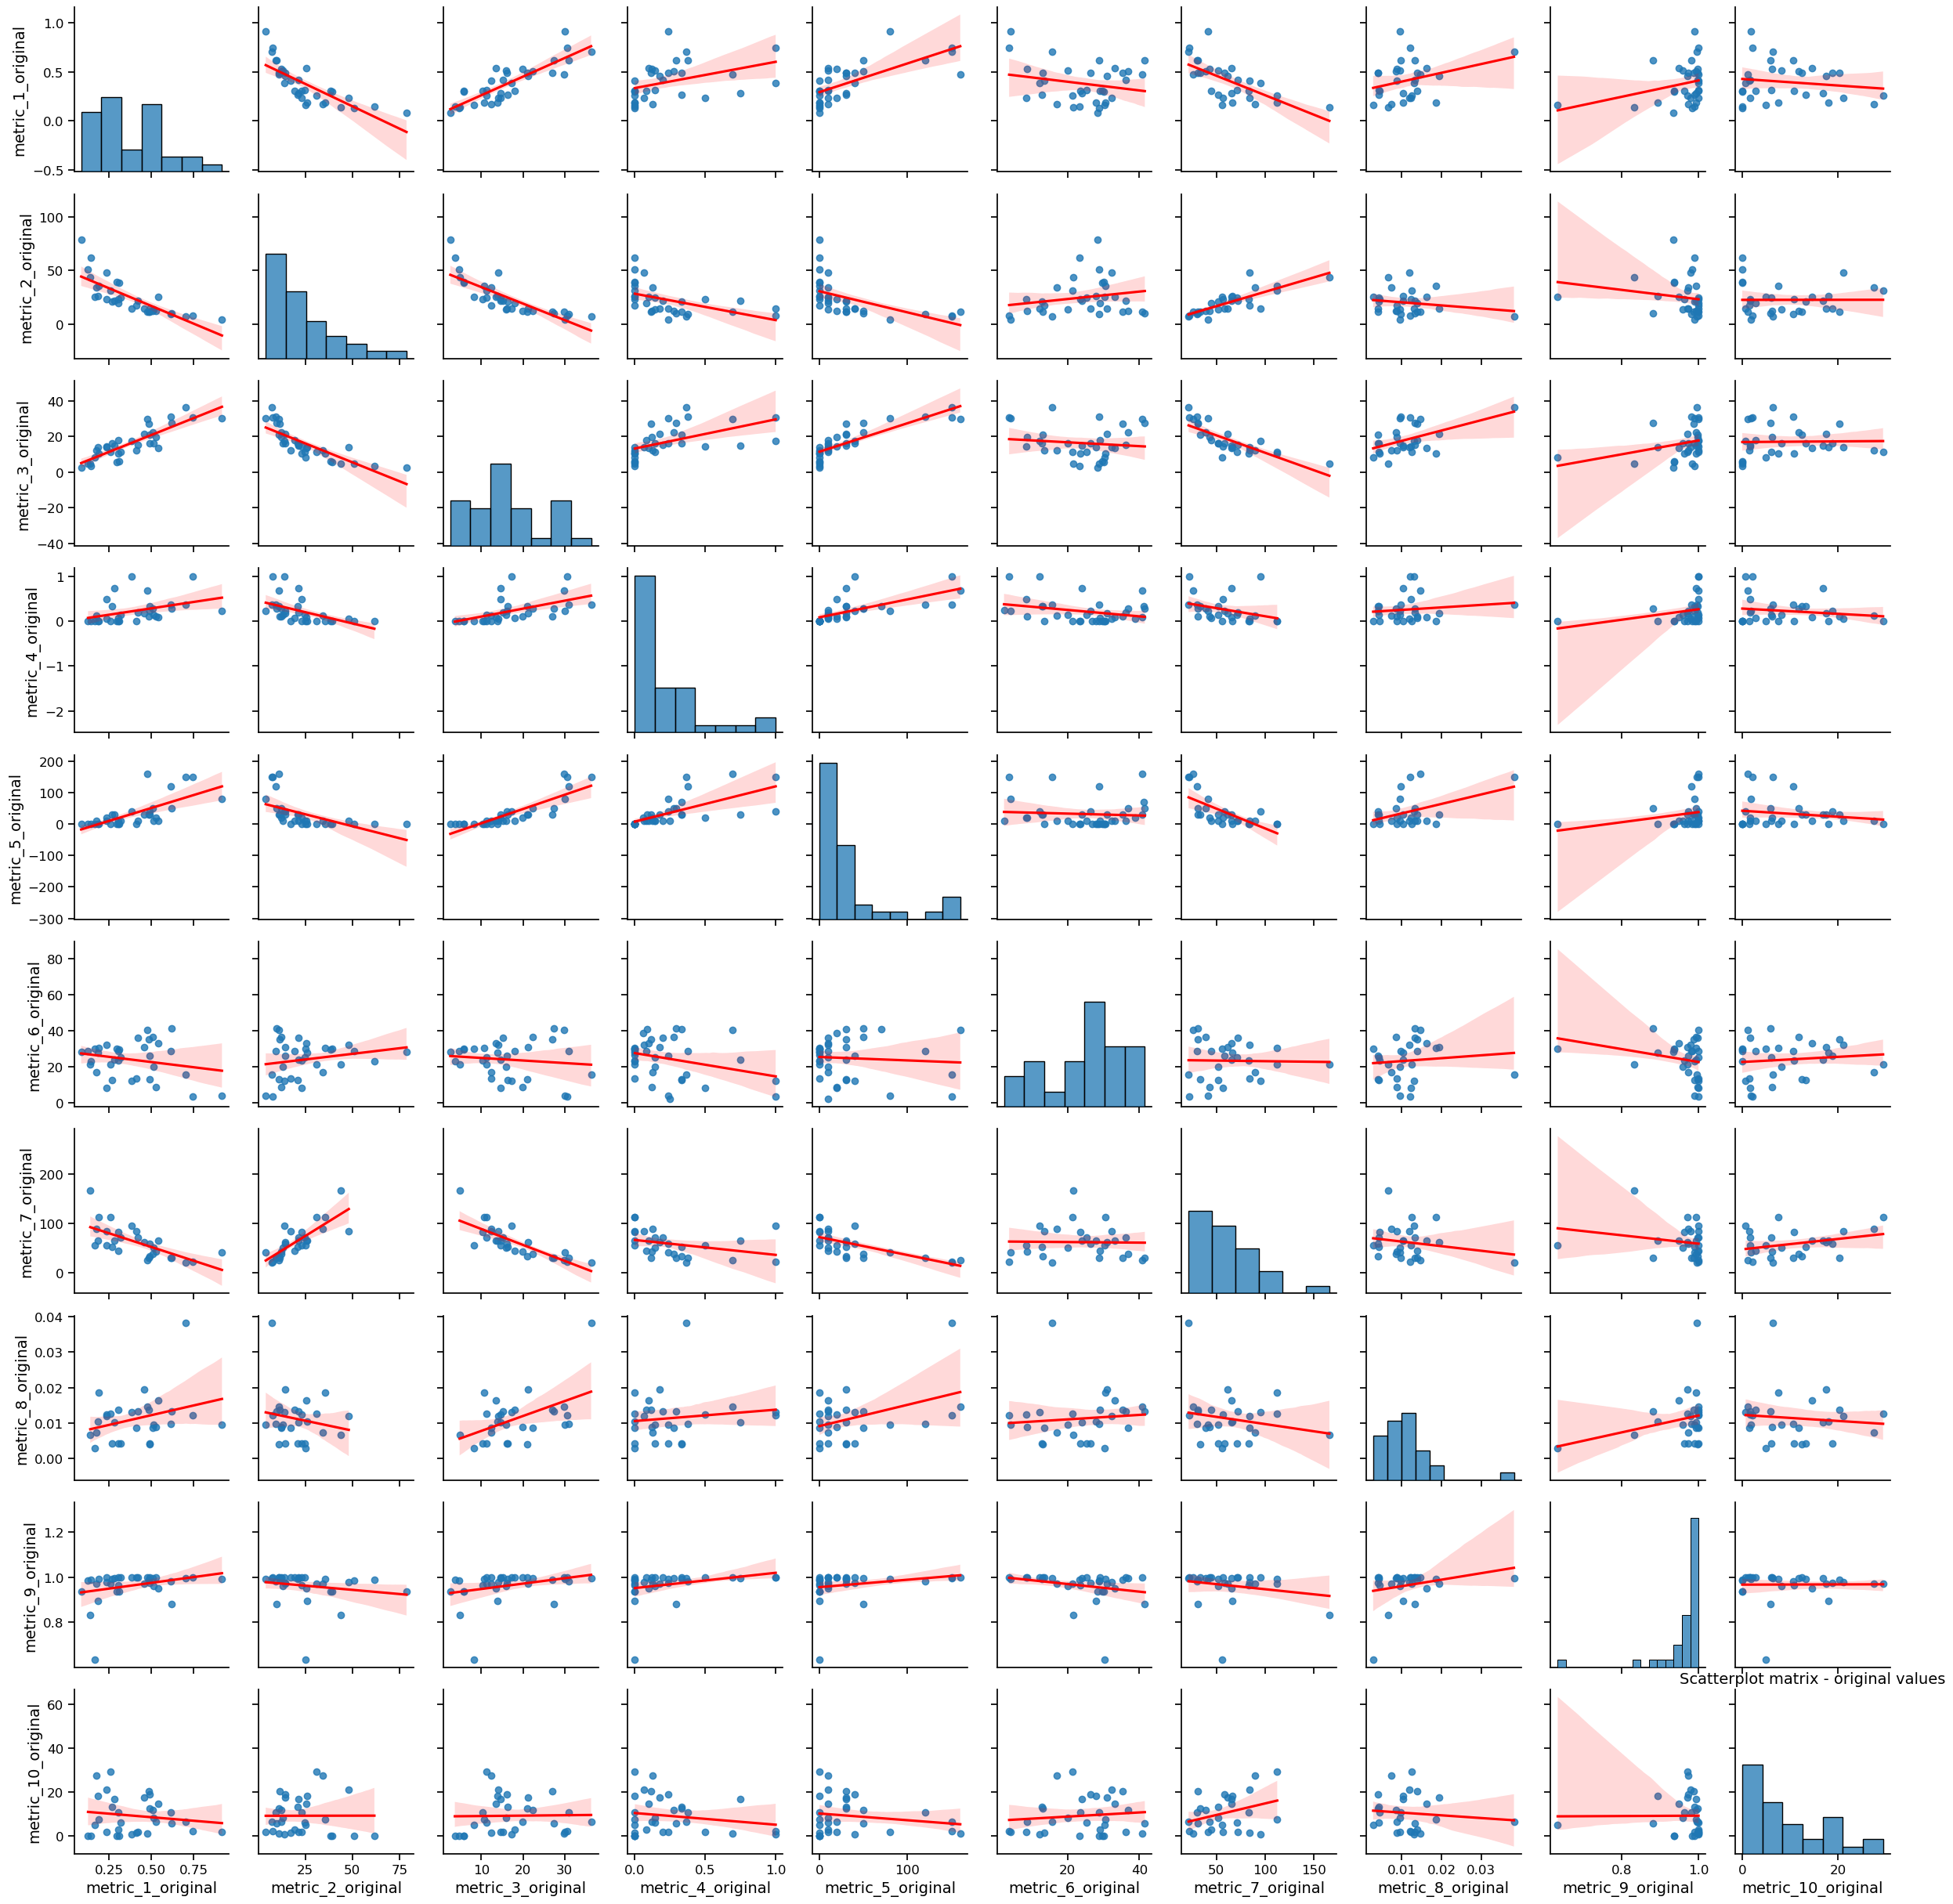

In [7]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[original_mask]

# Select relevant numerical columns for the scatterplot matrix
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Increase font size globally using Seaborn settings
sns.set_context("notebook", font_scale=1.5)  # Adjust `font_scale` as needed

# Create the scatterplot matrix with regression lines
g = sns.pairplot(df_subset[columns], kind="reg", plot_kws={'line_kws': {'color': 'red'}})

# Customize axis label fonts directly (optional, if you need more control)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  # Increase x-axis label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  # Increase y-axis label size
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size


plt.title('Scatterplot matrix - original values', fontsize=14)

# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_original_plain.png', dpi=300, bbox_inches='tight')
plt.show()


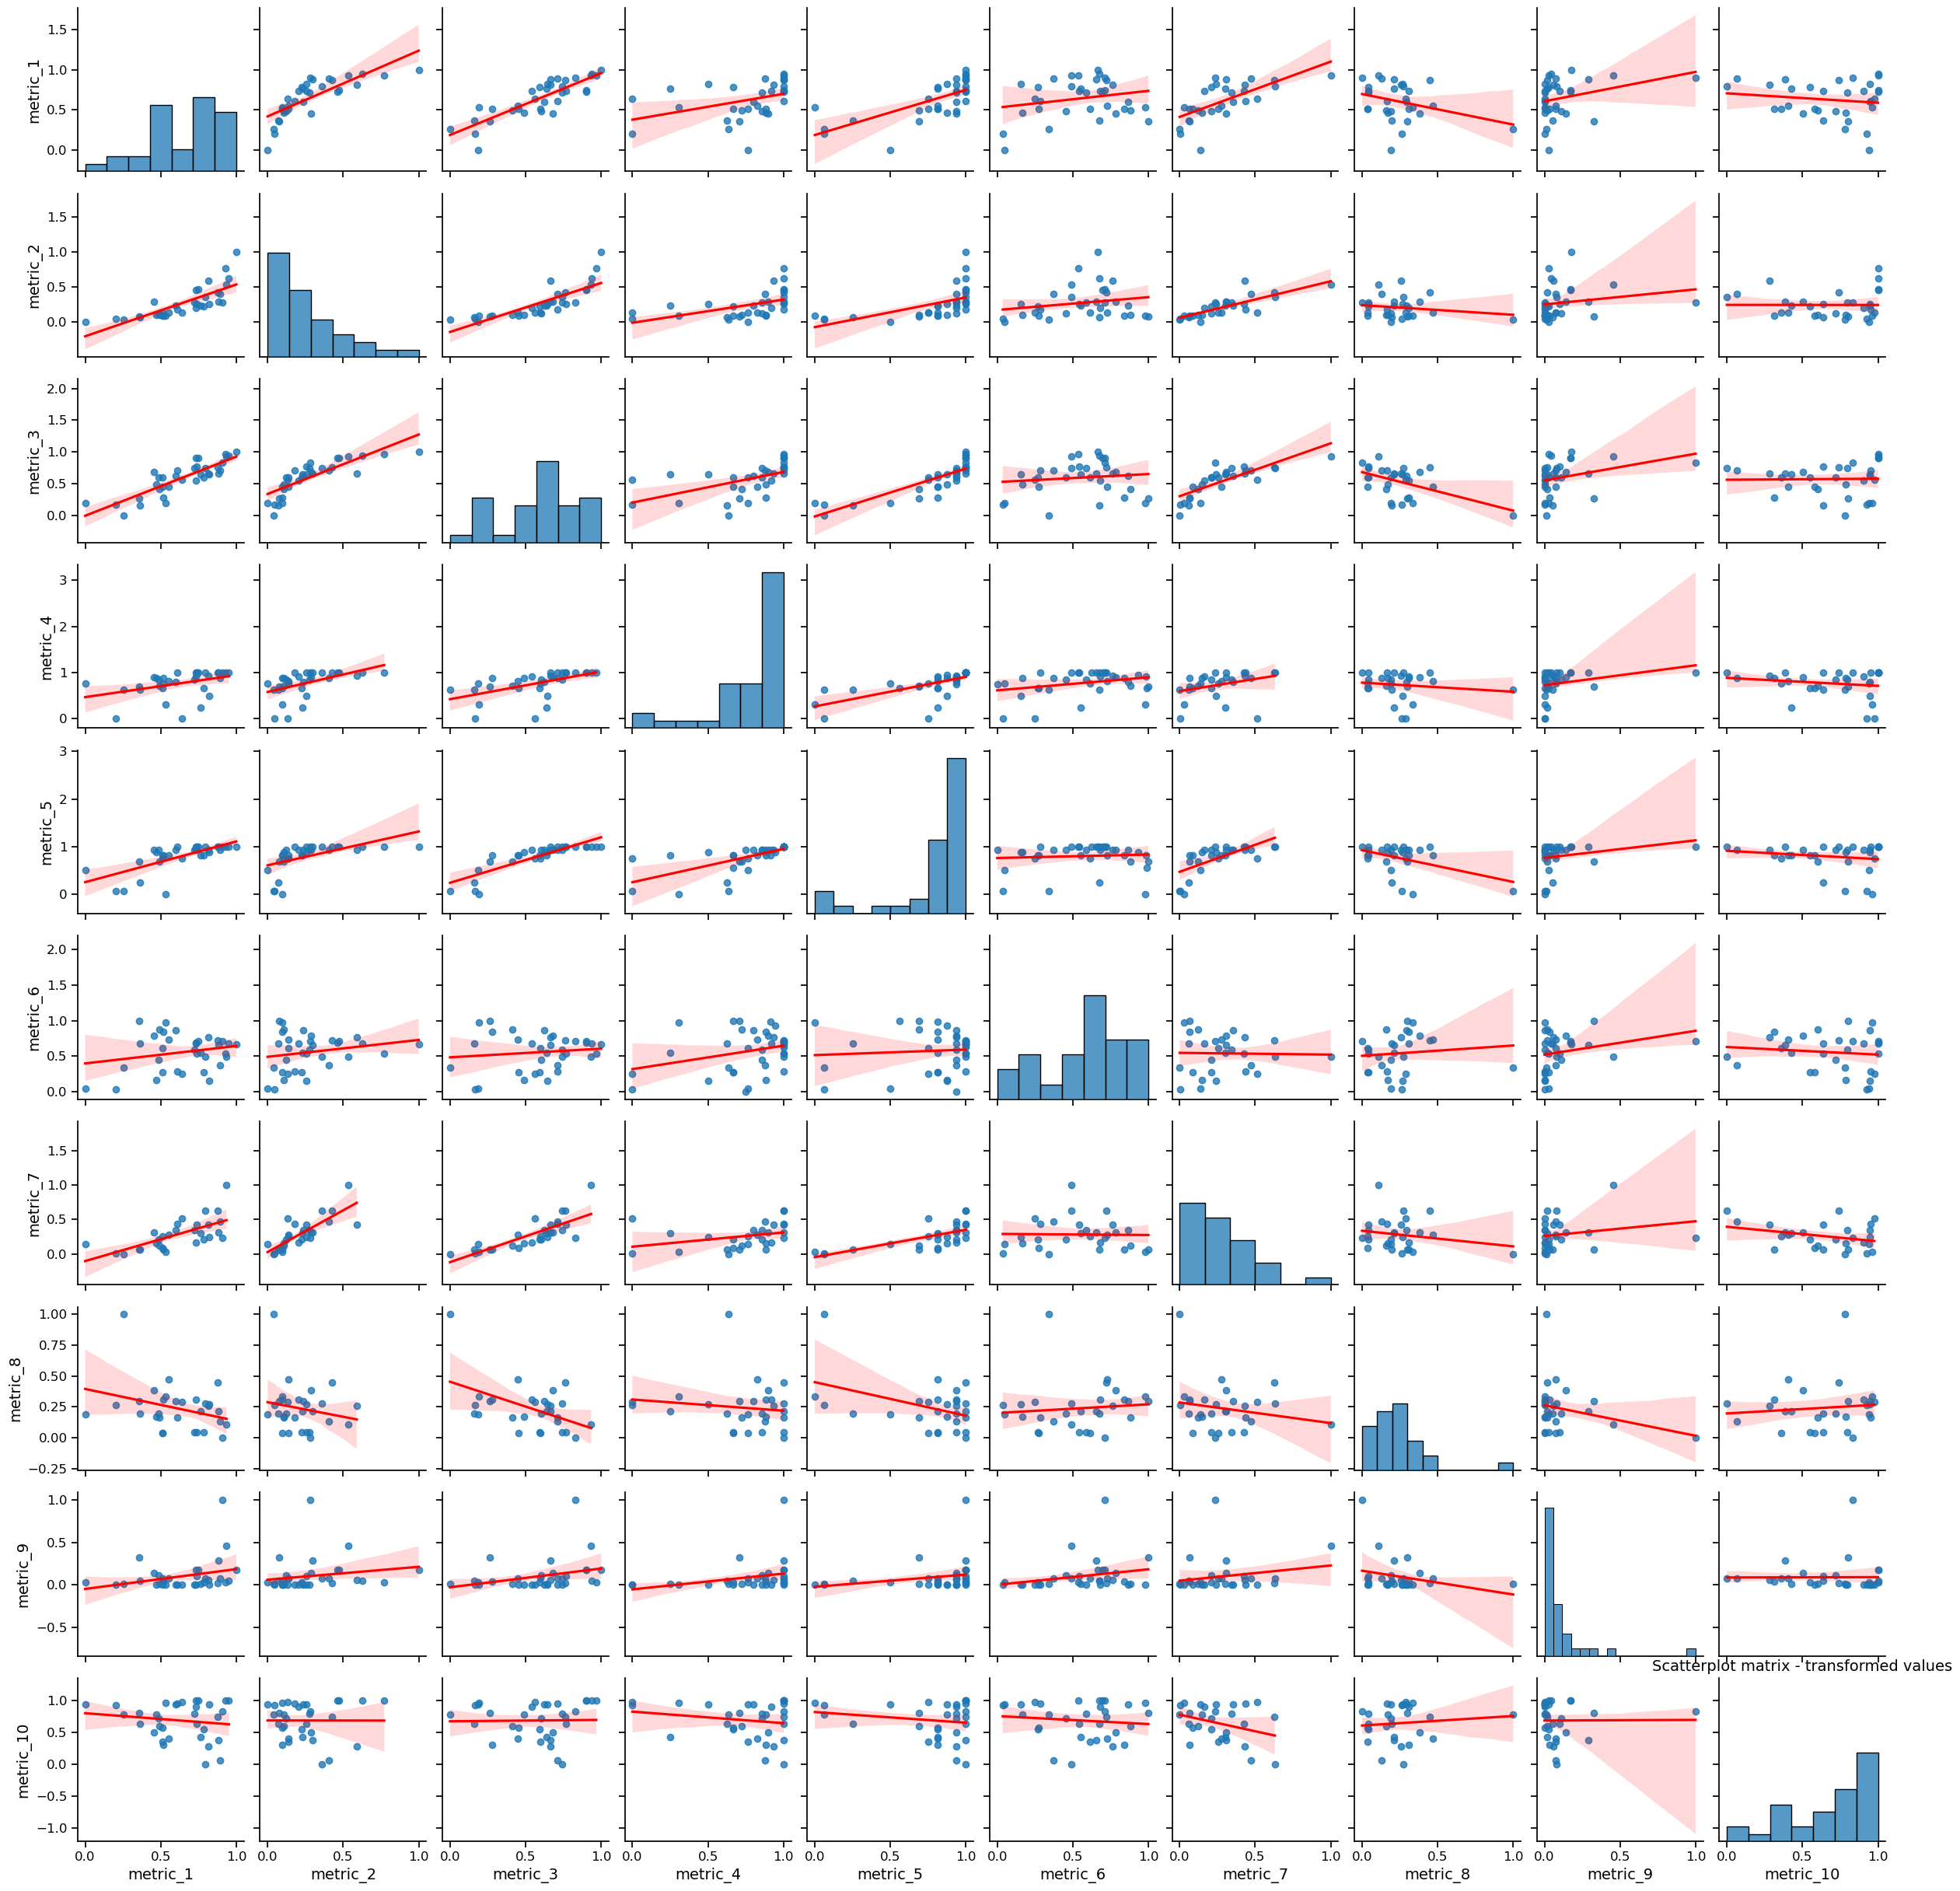

In [8]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[all_metrics_columns]

# Select relevant numerical columns for the scatterplot matrix
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Increase font size globally using Seaborn settings
sns.set_context("notebook", font_scale=1.5)  # Adjust `font_scale` as needed

# Create the scatterplot matrix with regression lines
g = sns.pairplot(df_subset[columns], kind="reg", plot_kws={'line_kws': {'color': 'red'}})

# Customize axis label fonts directly (optional, if you need more control)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  # Increase x-axis label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  # Increase y-axis label size
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size


plt.title('Scatterplot matrix - transformed values', fontsize=14)

# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_transformed_plain.png', dpi=300, bbox_inches='tight')
plt.show()

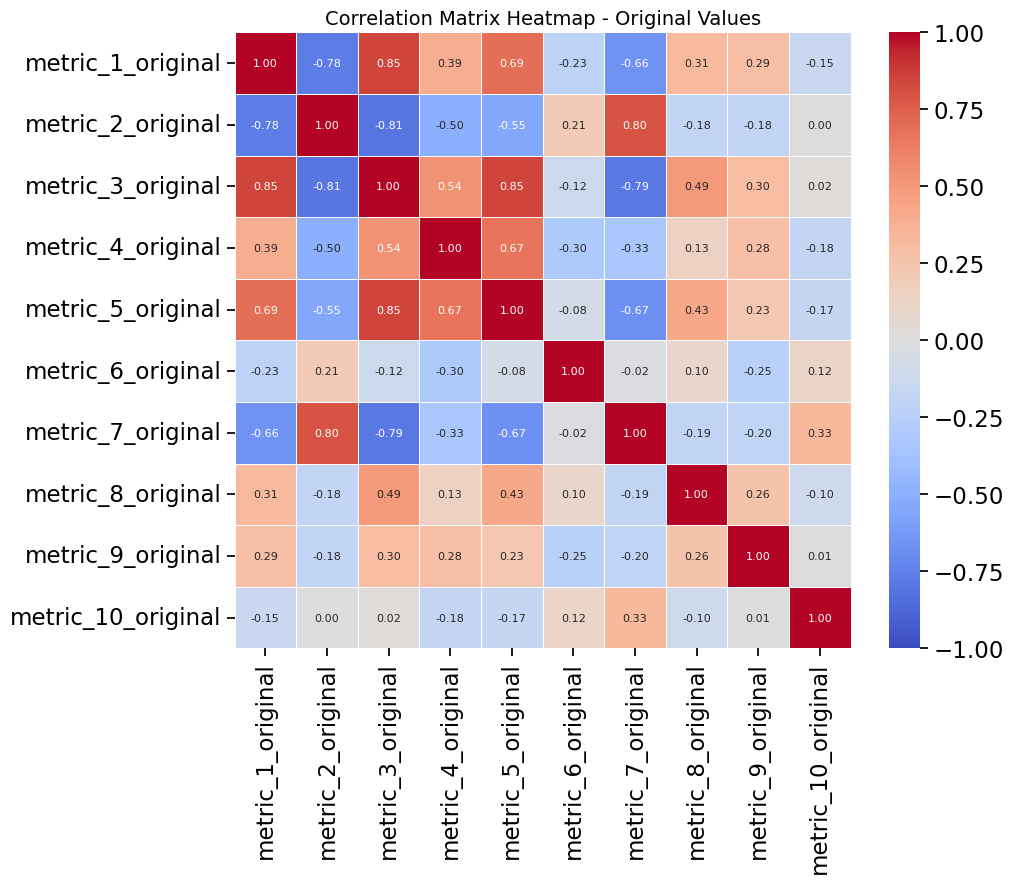

In [9]:
# Compute the correlation matrix
corr_matrix = final_geo_df[original_mask].corr()

# Plot the heatmap with smaller font size and 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f",  # Format numbers to 2 decimal places
    cmap='coolwarm', 
    vmin=-1, vmax=1, 
    square=True, 
    linewidths=0.5,
    annot_kws={"size": 8}  # Adjust the font size of the annotations
)

# Add title and save the plot
plt.title('Correlation Matrix Heatmap - Original Values', fontsize=14)
plt.savefig(f'{plots_path}/correlation_matrix_original.png', dpi=300, bbox_inches='tight')
plt.show()

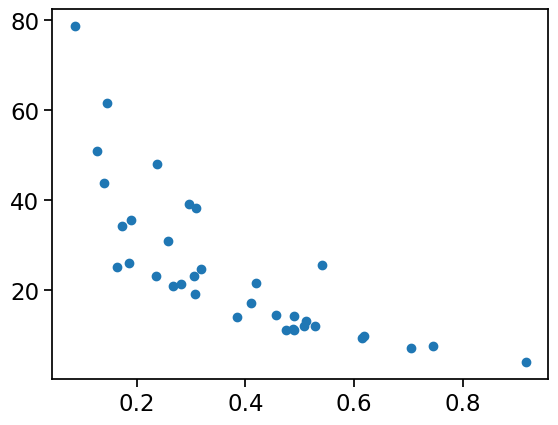

In [10]:
plt.scatter(final_geo_df.metric_1_original,final_geo_df.metric_2_original)


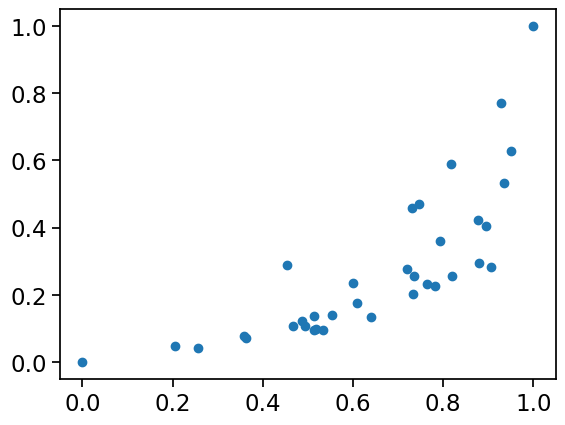

In [11]:
plt.scatter(final_geo_df.metric_1,final_geo_df.metric_2)


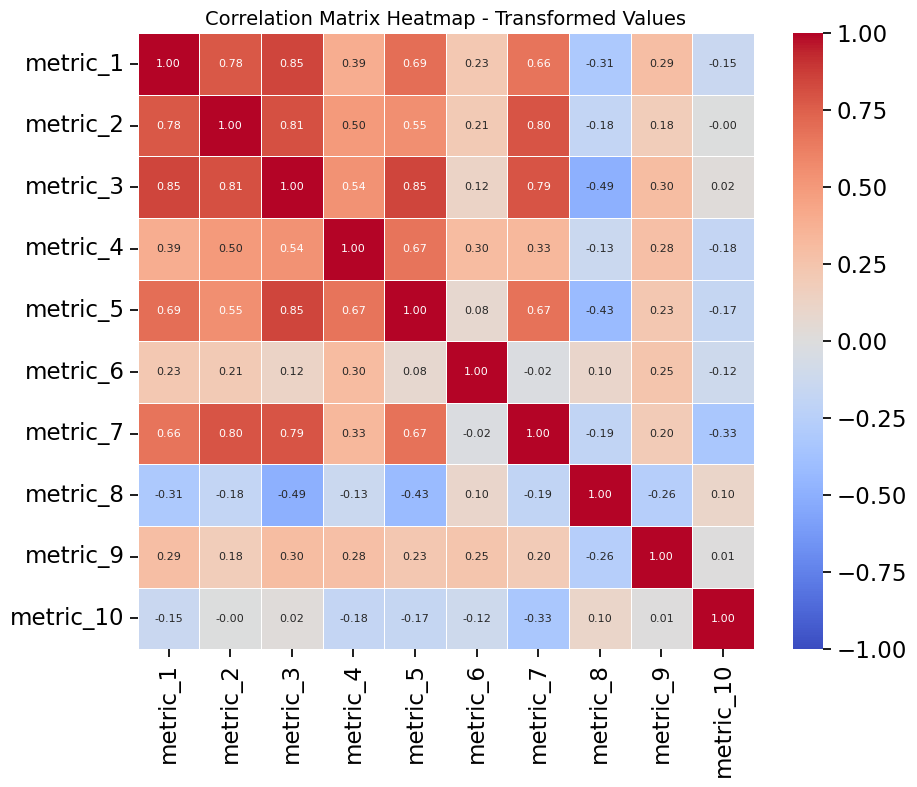

In [12]:
# Compute the correlation matrix
corr_matrix = final_geo_df[all_metrics_columns].corr()

# Plot the heatmap with smaller font size and 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f",  # Format numbers to 2 decimal places
    cmap='coolwarm', 
    vmin=-1, vmax=1, 
    square=True, 
    linewidths=0.5,
    annot_kws={"size": 8}  # Adjust the font size of the annotations
)

# Add title and save the plot
plt.title('Correlation Matrix Heatmap - Transformed Values', fontsize=14)
plt.savefig(f'{plots_path}/correlation_matrix_transformed.png', dpi=300, bbox_inches='tight')
plt.show()


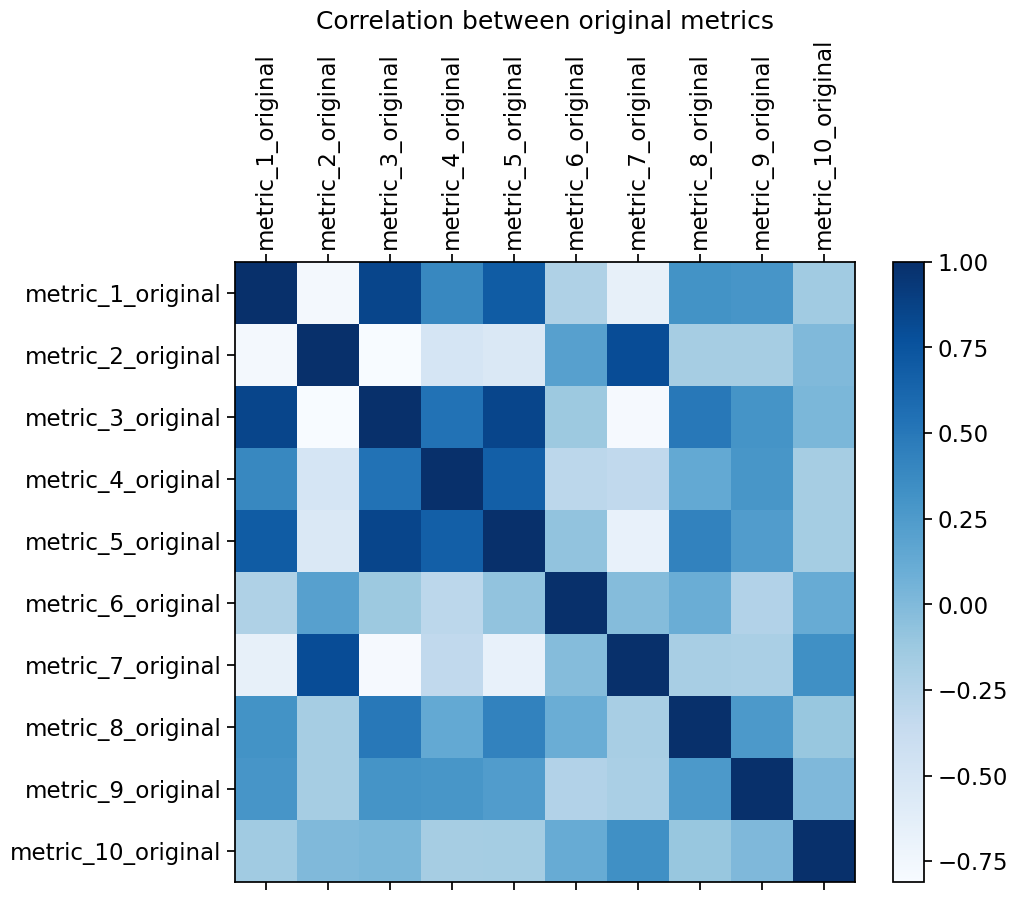

In [13]:
# Assuming BH_100 is your DataFrame, and all_original_metrics_columns contains the columns of interest

corr_matrix = final_geo_df.loc[:, original_mask].corr()

# Create the plot
plt.figure(figsize=(10, 8))

# Using a diverging colormap, such as `seismic`, `coolwarm`, or `PuBu_r`
# These will highlight 0 clearly while using one hue (for example, blue)
cax = plt.matshow(corr_matrix, cmap='Blues', fignum=1)  # Use any diverging colormap of your choice


# Add colorbar (legend)
plt.colorbar(cax)

# Add column and row names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90);  # Rotate x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

plt.title('Correlation between original metrics')

# Display the plot
plt.show()


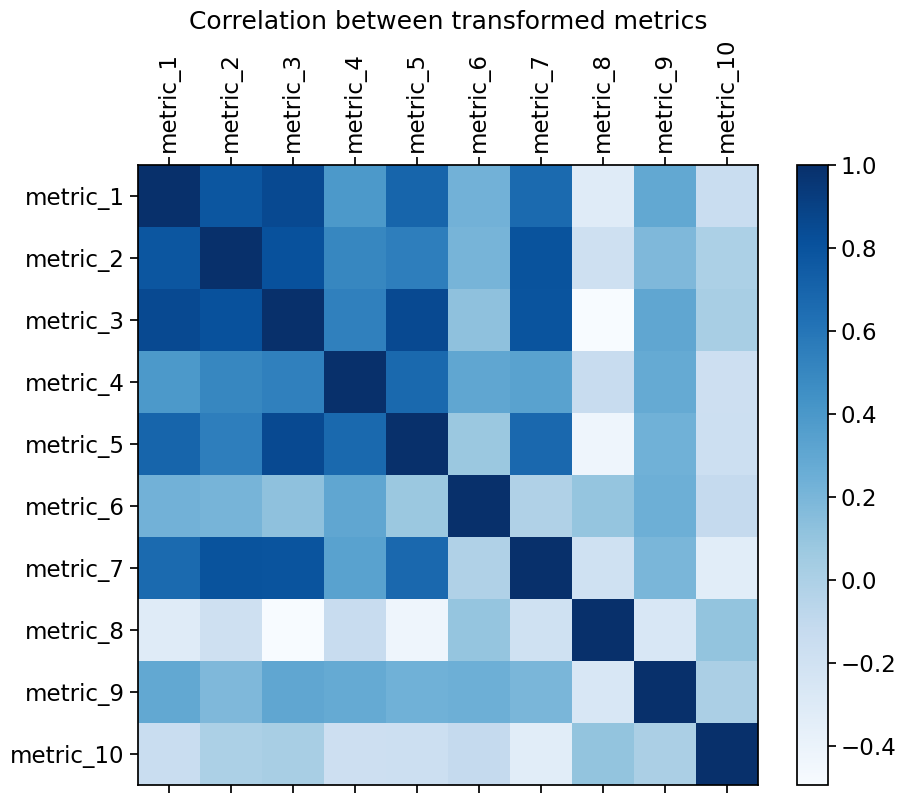

In [14]:
# Assuming BH_100 is your DataFrame, and all_original_metrics_columns contains the columns of interest
corr_matrix = final_geo_df.loc[:, all_metrics_columns].corr()


# Create the plot
plt.figure(figsize=(10, 8))

# Using a diverging colormap, such as `seismic`, `coolwarm`, or `PuBu_r`
# These will highlight 0 clearly while using one hue (for example, blue)
cax = plt.matshow(corr_matrix, cmap='Blues', fignum=1)  # Use any diverging colormap of your choice


# Add colorbar (legend)
plt.colorbar(cax)

# Add column and row names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90);  # Rotate x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

plt.title('Correlation between transformed metrics')

# Display the plot
plt.show()


In [15]:
final_geo_df.loc[:, all_original_metrics_columns].corr()

metric_1  metric_2_original  metric_3_original  metric_4  \
metric_1            1.000000           0.778421          -0.849693  0.391609   
metric_2_original   0.778421           1.000000          -0.809561  0.498972   
metric_3_original  -0.849693          -0.809561           1.000000 -0.538806   
metric_4            0.391609           0.498972          -0.538806  1.000000   
metric_5_original  -0.694271          -0.548239           0.849922 -0.668840   
metric_6_original   0.226553           0.208254          -0.124091  0.304701   
metric_7_original   0.664299           0.795834          -0.793427  0.330400   
metric_8           -0.313748          -0.180374           0.494284 -0.133602   
metric_9            0.292267           0.180212          -0.304465  0.282006   
metric_10_original  0.147000           0.001843           0.018568  0.176944   

                    metric_5_original  metric_6_original  metric_7_original  \
metric_1                    -0.694271           0.226553           0.664299   
metric_2_original           -0.548239           0.208254           0.795834   
metric_3_original            0.849922          -0.124091          -0.793427   
metric_4                    -0.668840           0.304701           0.330400   
metric_5_original            1.000000          -0.075250          -0.674066   
metric_6_original           -0.075250           1.000000          -0.020260   
metric_7_original           -0.674066          -0.020260           1.000000   
metric_8                     0.425066           0.100938          -0.194531   
metric_9                    -0.230165           0.246361           0.195806   
metric_10_original          -0.170441           0.116302           0.332294   

                    metric_8  metric_9  metric_10_original  
metric_1           -0.313748  0.292267            0.147000  
metric_2_original  -0.180374  0.180212            0.001843  
metric_3_original   0.494284 -0.304465            0.018568  
metric_4           -0.133602  0.282006            0.176944  
metric_5_original   0.425066 -0.230165           -0.170441  
metric_6_original   0.100938  0.246361            0.116302  
metric_7_original  -0.194531  0.195806            0.332294  
metric_8            1.000000 -0.262312           -0.103134  
metric_9           -0.262312  1.000000           -0.006517  
metric_10_original -0.103134 -0.006517            1.000000

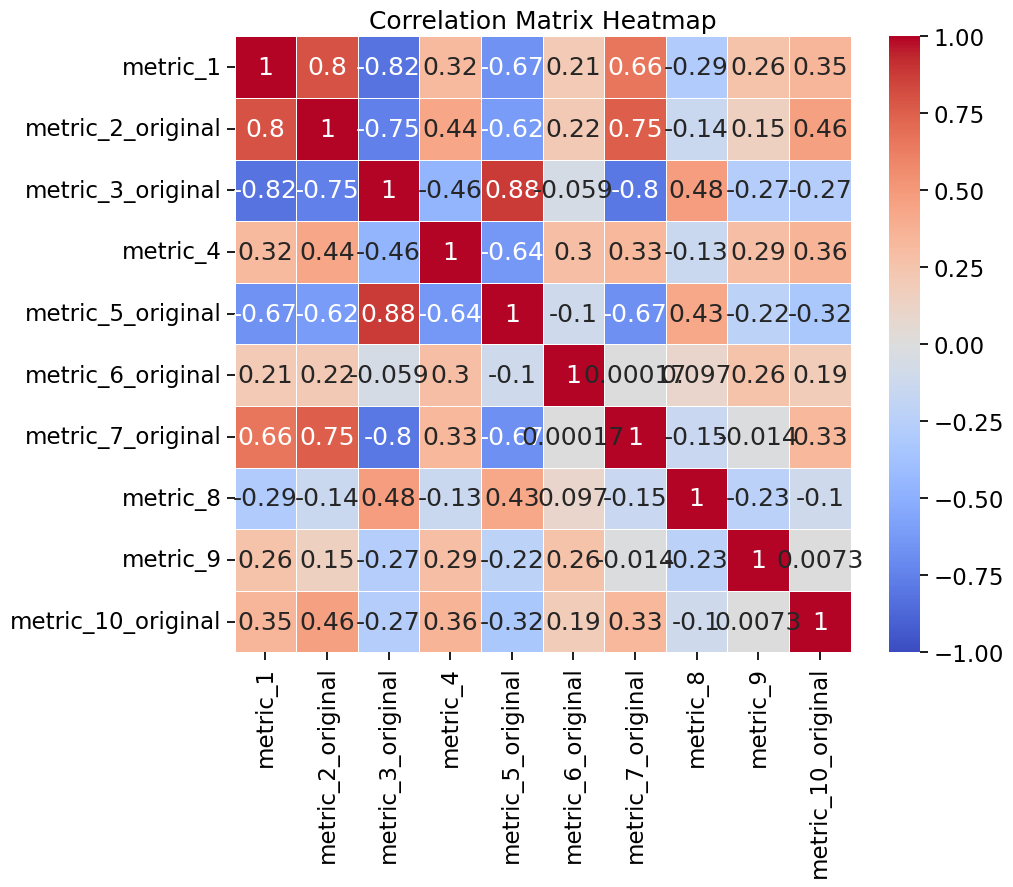

In [16]:
features = all_original_metrics_columns
x = final_geo_df.dropna(how='any').loc[:, features].values
#y = BH_100.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

standardized_df = pd.DataFrame(x, columns=features)

# Compute the correlation matrix
corr_matrix = standardized_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, final_geo_df['irregularity_index']], axis = 1)

In [18]:
principalDf

principal component 1  principal component 2
0                1.682046               2.305291
1               -3.017130               0.399266
2                0.766159              -2.477204
3               -0.230517               0.358546
4               -0.948026               0.938582
5                3.310312               1.094645
6               -0.201094              -1.785472
7                4.632077              -1.603467
8               -2.792949               2.374850
9               -0.278151               0.110016
10               0.737015              -0.902020
11               3.337658              -0.893117
12              -0.584209               0.295312
13              -3.146402              -0.360074
14               0.866303              -0.772628
15               0.821719               1.598207
16              -0.962598              -1.268025
17               4.730089               0.928852
18               0.030718              -0.088927
19              -2.769716              -0.189448
20              -0.464421              -0.910943
21               0.885943               0.970003
22              -1.476133              -0.623521
23               2.684502               0.867051
24              -2.080979              -0.387311
25               0.163553               0.948380
26              -2.887192              -0.722262
27              -2.222487               0.908060
28              -0.586091              -1.112644

In [19]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

# Display the loadings
print(loadings)

                         PC1       PC2
metric_1           -0.395901 -0.048525
metric_2_original  -0.396371 -0.025413
metric_3_original   0.431553  0.175043
metric_4           -0.284961  0.352956
metric_5_original   0.408180  0.065091
metric_6_original  -0.103497  0.688218
metric_7_original  -0.369682 -0.287013
metric_8            0.186056  0.183641
metric_9           -0.140177  0.475306
metric_10_original -0.224630  0.147933


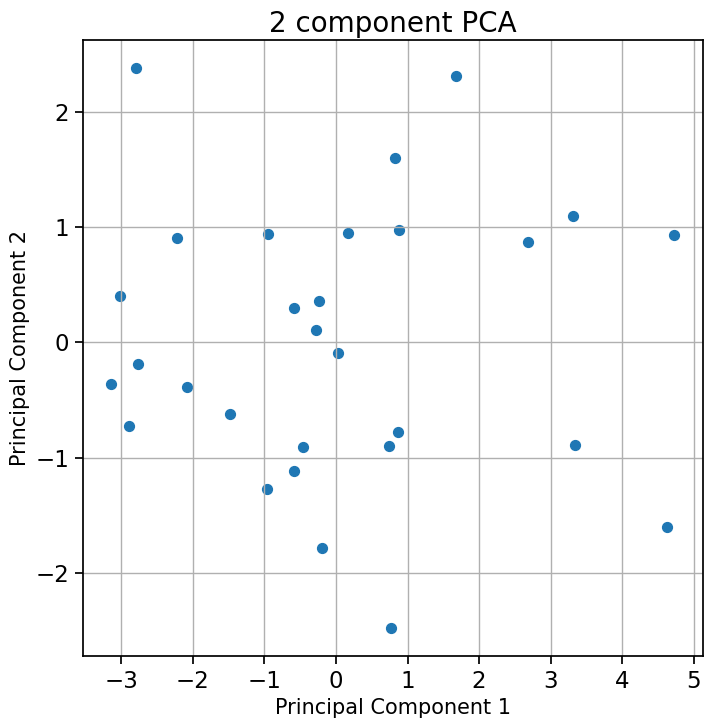

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf.loc[:, 'principal component 1'], 
           finalDf.loc[:, 'principal component 2'],
           s = 50)

ax.grid()

In [21]:
pca.explained_variance_ratio_

array([0.47065063, 0.13540638])

In [22]:
final_geo_df[features].describe()

metric_1  metric_2_original  metric_3_original   metric_4  \
count  35.000000          35.000000          35.000000  38.000000   
mean    0.645299          24.669287          16.287393   0.779156   
std     0.235932          16.672466           8.763144   0.263784   
min     0.000000           4.123467           2.553153   0.000000   
25%     0.503397          12.190211          10.921876   0.676471   
50%     0.720822          21.383327          14.678110   0.866071   
75%     0.818564          32.705854          21.128070   1.000000   
max     1.000000          78.720982          36.347777   1.000000   

       metric_5_original  metric_6_original  metric_7_original   metric_8  \
count          39.000000          48.000000          30.000000  30.000000   
mean           31.538450          25.240123          62.137279   0.238021   
std            43.862202          10.717078          31.946814   0.189026   
min             0.000000           2.346872          21.382172   0.000000   
25%             0.000000          19.291131          39.594670   0.137397   
50%            10.000052          27.411125          57.276990   0.211683   
75%            34.999838          32.364564          80.158761   0.296995   
max           160.000267          41.542770         166.015551   1.000000   

        metric_9  metric_10_original  
count  35.000000           33.000000  
mean    0.102778            9.134713  
std     0.187681            8.357494  
min     0.000000            0.000000  
25%     0.004430            1.594086  
50%     0.035004            6.372380  
75%     0.106240           14.549268  
max     1.000000           29.421683

In [23]:
len(final_geo_df[features].dropna(how='any'))



29

In [24]:
kmeans = KMeans(n_clusters=3)  # You can experiment with the number of clusters
kmeans.fit(x)  # 'x' being the scaled version of your metrics
labels = kmeans.labels_

In [25]:
labels

array([2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 0, 2, 2, 1, 1, 2], dtype=int32)

**Factor analysis**

In [26]:
# Factor analysis
fa = FactorAnalysis(n_components=2)
components = fa.fit_transform(x)

In [27]:

rf = RandomForestRegressor()
rf.fit(x, labels)
feature_importance = rf.feature_importances_
